CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# Reaading credit card csv
data = pd.read_csv("C:/Users/harsh/Downloads/creditcard.csv/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

How many frauds are  present ?


In [8]:
class_name={0:"Not fraud",1:"Fraud"}
print(data.Class.value_counts().rename(index=class_name))

Not fraud    284315
Fraud           492
Name: Class, dtype: int64


In [9]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Time'),
  Text(1, 0, 'V1'),
  Text(2, 0, 'V2'),
  Text(3, 0, 'V3'),
  Text(4, 0, 'V4'),
  Text(5, 0, 'V5'),
  Text(6, 0, 'V6'),
  Text(7, 0, 'V7'),
  Text(8, 0, 'V8'),
  Text(9, 0, 'V9'),
  Text(10, 0, 'V10'),
  Text(11, 0, 'V11'),
  Text(12, 0, 'V12'),
  Text(13, 0, 'V13'),
  Text(14, 0, 'V14'),
  Text(15, 0, 'V15'),
  Text(16, 0, 'V16'),
  Text(17, 0, 'V17'),
  Text(18, 0, 'V18'),
  Text(19, 0, 'V19'),
  Text(20, 0, 'V20'),
  Text(21, 0, 'V21'),
  Text(22, 0, 'V22'),
  Text(23, 0, 'V23'),
  Text(24, 0, 'V24'),
  Text(25, 0, 'V25'),
  Text(26, 0, 'V26'),
  Text(27, 0, 'V27'),
  Text(28, 0, 'V28'),
  Text(29, 0, 'Amount'),
  Text(30, 0, 'Class')])

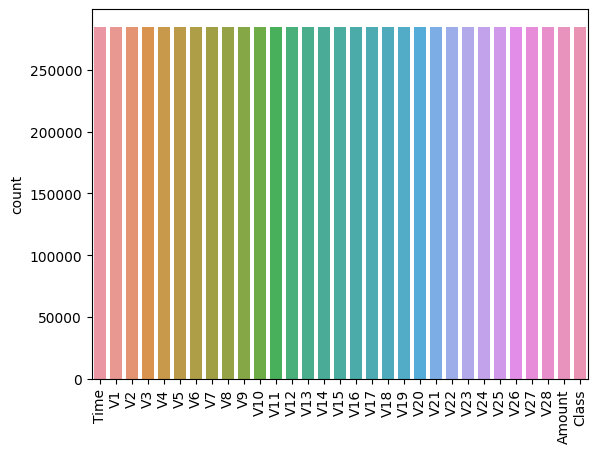

In [11]:
sb.countplot(data)
plt.xticks(rotation=90)

<AxesSubplot: xlabel='Amount', ylabel='Time'>

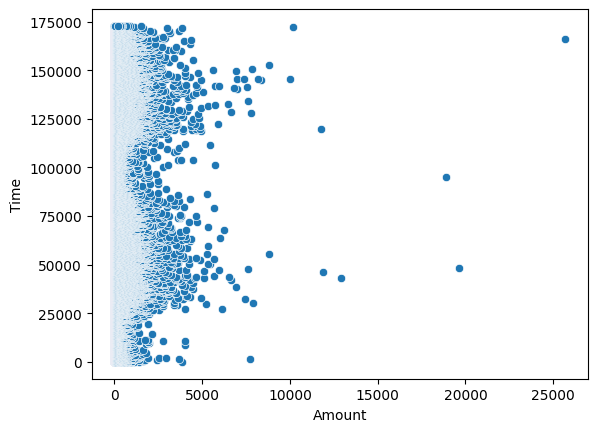

In [12]:
sb.scatterplot(data=data,x="Amount",y="Time")

In [15]:
feature_names = data.iloc[:, 1:30].columns
target = data.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [16]:
data_features=data[feature_names]
data_target=data[target]

Splitting Into Train Test using sklearn model_selection

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_features,data_target,test_size=0.2,random_state=45)

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train.values.ravel())

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_prediction_train=log_reg.predict(x_train)
y_prediction_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
y_prediction_test=log_reg.predict(x_test)
y_prediction_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

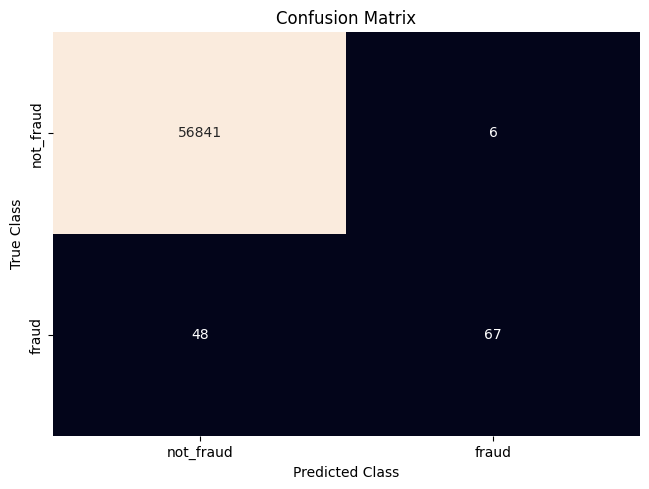

In [32]:
from sklearn.metrics import confusion_matrix
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, y_prediction_test)
# Created dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sb.heatmap(dataframe, annot=True, cbar=None,fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [34]:
from sklearn.metrics import recall_score,f1_score
f1_score = round(f1_score(y_test, y_prediction_test), 2)
recall_score = round(recall_score(y_test, y_prediction_test), 2)
print("f1_score=",f1_score)
print("recall_score=",recall_score)

f1_score= 0.71
recall_score= 0.58


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
from sklearn.metrics import classification_report
print("Train Report\n",classification_report(y_train,y_prediction_train))
print("Test Report\n",classification_report(y_test,y_prediction_test))

Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227468
           1       0.86      0.56      0.68       377

    accuracy                           1.00    227845
   macro avg       0.93      0.78      0.84    227845
weighted avg       1.00      1.00      1.00    227845

Test Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.92      0.58      0.71       115

    accuracy                           1.00     56962
   macro avg       0.96      0.79      0.86     56962
weighted avg       1.00      1.00      1.00     56962



<function matplotlib.pyplot.show(close=None, block=None)>

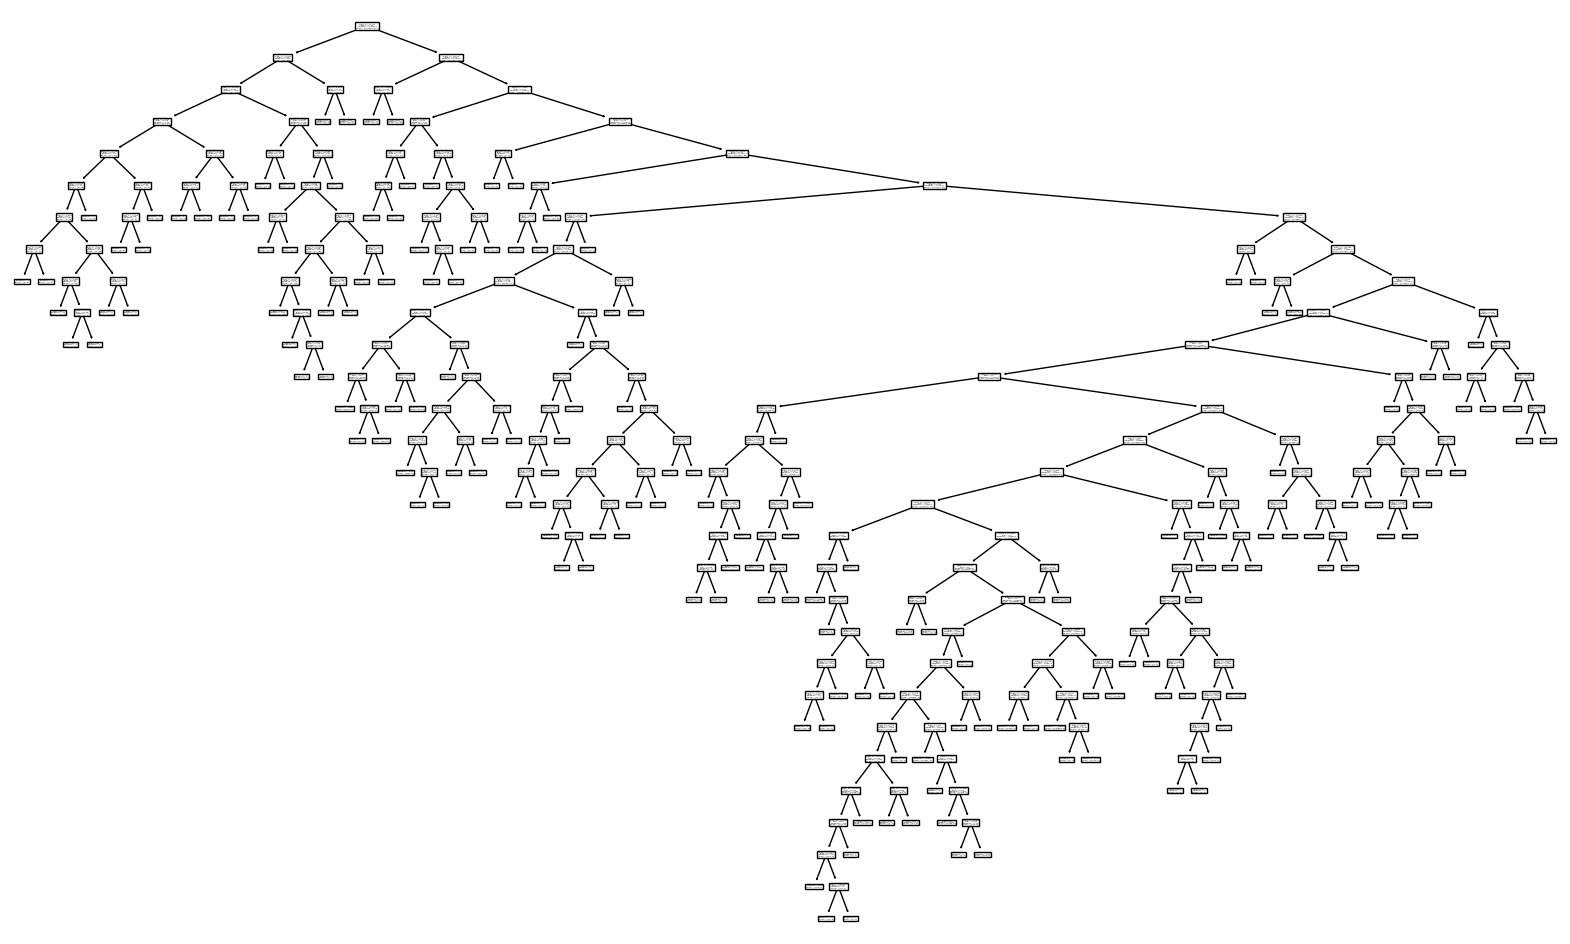

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,12])
plot_tree(dtc)
plt.show

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [40]:
from sklearn.metrics import accuracy_score
print("train_acc:",accuracy_score(y_train,y_prediction_train))
print("test_acc:",accuracy_score(y_test,y_prediction_test))

train_acc: 0.9991222102745287
test_acc: 0.9990519995786665


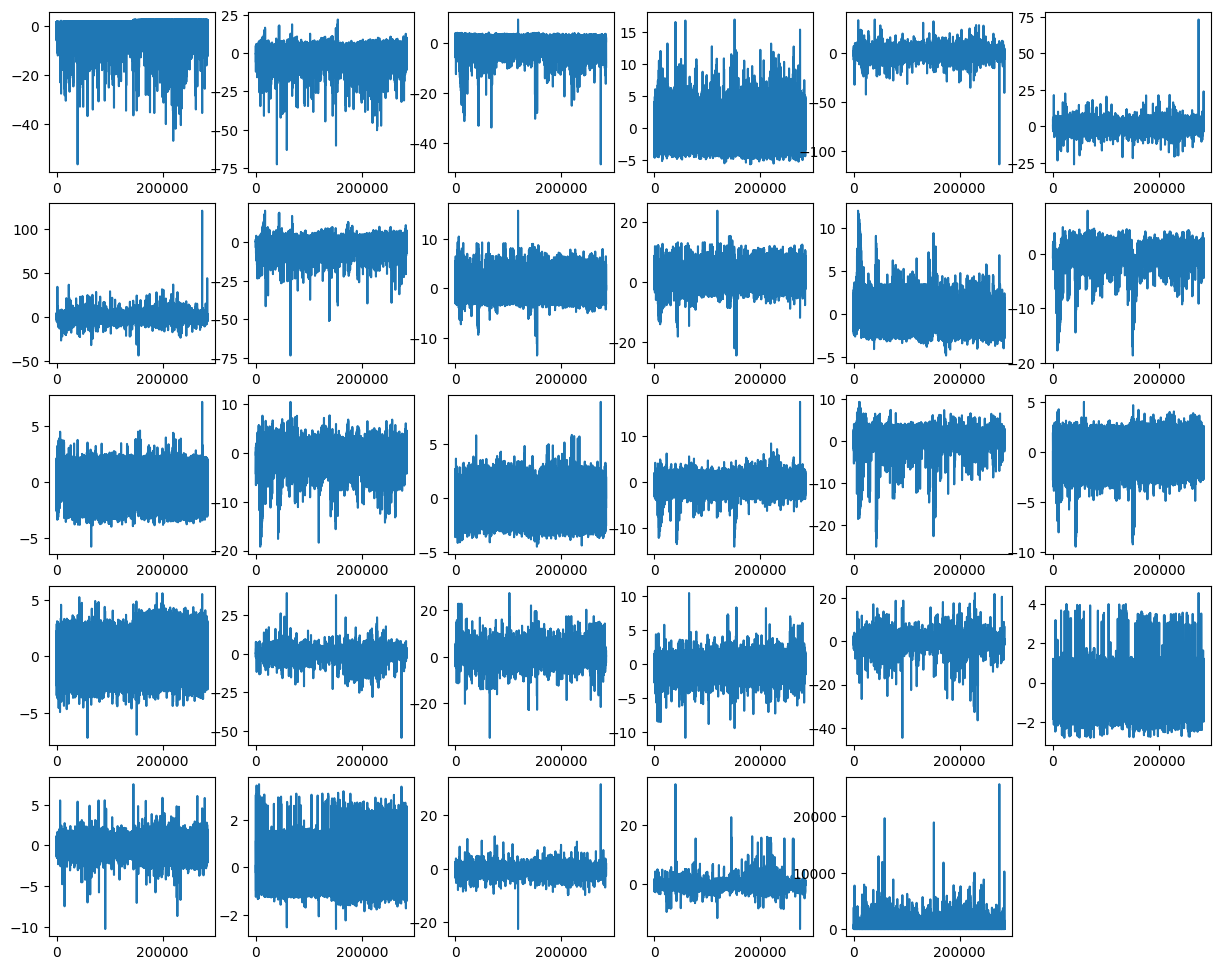

In [41]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(data.V1) ; plt.subplot(5, 6, 15) ; plt.plot(data.V15)
plt.subplot(5, 6, 2) ; plt.plot(data.V2) ; plt.subplot(5, 6, 16) ; plt.plot(data.V16)
plt.subplot(5, 6, 3) ; plt.plot(data.V3) ; plt.subplot(5, 6, 17) ; plt.plot(data.V17)
plt.subplot(5, 6, 4) ; plt.plot(data.V4) ; plt.subplot(5, 6, 18) ; plt.plot(data.V18)
plt.subplot(5, 6, 5) ; plt.plot(data.V5) ; plt.subplot(5, 6, 19) ; plt.plot(data.V19)
plt.subplot(5, 6, 6) ; plt.plot(data.V6) ; plt.subplot(5, 6, 20) ; plt.plot(data.V20)
plt.subplot(5, 6, 7) ; plt.plot(data.V7) ; plt.subplot(5, 6, 21) ; plt.plot(data.V21)
plt.subplot(5, 6, 8) ; plt.plot(data.V8) ; plt.subplot(5, 6, 22) ; plt.plot(data.V22)
plt.subplot(5, 6, 9) ; plt.plot(data.V9) ; plt.subplot(5, 6, 23) ; plt.plot(data.V23)
plt.subplot(5, 6, 10) ; plt.plot(data.V10) ; plt.subplot(5, 6, 24) ; plt.plot(data.V24)
plt.subplot(5, 6, 11) ; plt.plot(data.V11) ; plt.subplot(5, 6, 25) ; plt.plot(data.V25)
plt.subplot(5, 6, 12) ; plt.plot(data.V12) ; plt.subplot(5, 6, 26) ; plt.plot(data.V26)
plt.subplot(5, 6, 13) ; plt.plot(data.V13) ; plt.subplot(5, 6, 27) ; plt.plot(data.V27)
plt.subplot(5, 6, 14) ; plt.plot(data.V14) ; plt.subplot(5, 6, 28) ; plt.plot(data.V28)
plt.subplot(5, 6, 29) ; plt.plot(data.Amount)
plt.show()